In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split

df = pd.read_csv('data.csv')

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

def print_metrics(mse, mae, r2):
    print(f'MSE: {mse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R2: {r2:.3f}')

# AdaBoost

### Train AdaBoost in which base estimator used is Decision Stump (A node with 2 leaves)

In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(max_depth=1, random_state=42),
        random_state=42,
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1,
                                                                   random_state=42),
                                   random_state=42))])

In [4]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 17.739
MAE: 3.403
R2: 0.620

Test set:
MSE: 18.236
MAE: 3.442
R2: 0.611


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.59388704 0.57561769 0.64216137 0.63974278 0.57784748]
R^2 trung bình: 0.606 ± 0.029

MSE: [19.13877581 19.38992012 16.79477391 16.84333701 19.85928177]
MSE trung bình: 18.405± 1.316

MAE: [3.49749958 3.57700459 3.29716288 3.32108702 3.59856998]
MAE trung bình: 3.458 ± 0.127


### Tuning n_estimators in Ada

In [6]:
pipeline = Pipeline([
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(
            max_depth=1, 
            random_state=42
        ),
        random_state=42,
        n_estimators=20
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1,
                                                                   random_state=42),
                                   n_estimators=20, random_state=42))])

In [7]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 15.477
MAE: 3.147
R2: 0.668

Test set:
MSE: 15.651
MAE: 3.170
R2: 0.666


In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.66182302 0.65534777 0.70820706 0.69257715 0.66806083]
R^2 trung bình: 0.677 ± 0.020

MSE: [15.93717536 15.74707286 13.6949899  14.37313783 15.61538337]
MSE trung bình: 15.074± 0.881

MAE: [3.20494084 3.19914539 2.9385447  3.04259322 3.15614204]
MAE trung bình: 3.108 ± 0.103


In [9]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(
        estimator=DecisionTreeRegressor(random_state=42, max_depth=17, ccp_alpha=0.0004872495324492965,
                                        min_samples_split=35, min_samples_leaf=9),
        random_state=42,
        n_estimators=30,
        # learning_rate=1
    ))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(ccp_alpha=0.0004872495324492965,
                                                                   max_depth=17,
                                                                   min_samples_leaf=9,
                                                                   min_samples_split=35,
                                                                   random_state=42),
                                   n_estimators=30, random_state=42))])

In [10]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 0.589
MAE: 0.649
R2: 0.987

Test set:
MSE: 2.025
MAE: 1.070
R2: 0.957


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.95644793 0.95993775 0.9585936  0.95148796 0.96049931]
R^2 trung bình: 0.957 ± 0.003

MSE: [2.05246644 1.83043386 1.94336516 2.26811469 1.85822739]
MSE trung bình: 1.991± 0.159

MAE: [1.07812576 1.02572197 1.03922301 1.08345825 1.03354959]
MAE trung bình: 1.052 ± 0.024


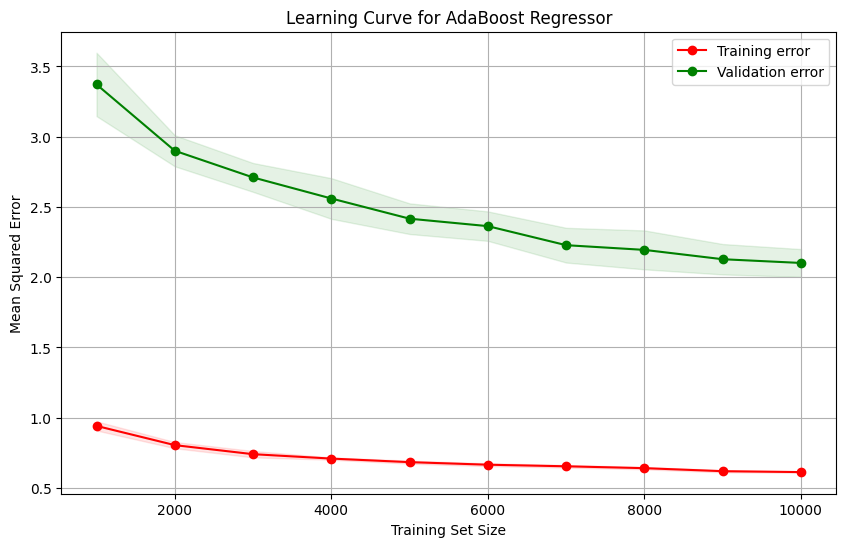

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    pipeline,
    X_train,
    y_train,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve for AdaBoost Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation error")

plt.legend(loc="best")
plt.grid()
plt.show()

# Gradient Boosting

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model', GradientBoostingRegressor(random_state=42))])

In [14]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 2.104
MAE: 1.109
R2: 0.955

Test set:
MSE: 2.386
MAE: 1.179
R2: 0.949


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.94829727 0.9501261  0.9490822  0.94303325 0.95154374]
R^2 trung bình: 0.948 ± 0.003

MSE: [2.43658083 2.27872585 2.38977244 2.66340319 2.27952345]
MSE trung bình: 2.410± 0.141

MAE: [1.19702063 1.15222553 1.15972294 1.2037743  1.14417104]
MAE trung bình: 1.171 ± 0.024


# XGBoost

In [16]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('model', XGBRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [17]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 0.491
MAE: 0.540
R2: 0.989

Test set:
MSE: 1.889
MAE: 1.032
R2: 0.960


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
mse_scores = -mse_scores
print(f"MSE: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores: [0.96087695 0.96130925 0.959956   0.95636245 0.96214965]
R^2 trung bình: 0.960 ± 0.002

MSE: [1.84374121 1.76777045 1.87942225 2.04021431 1.78059062]
MSE trung bình: 1.862± 0.098

MAE: [1.03068537 1.01562841 1.0297803  1.06374284 1.01237206]
MAE trung bình: 1.030 ± 0.018


# LightGBM

In [19]:
from lightgbm import LGBMRegressor

pipeline = Pipeline([
    ('model', LGBMRegressor(random_state=42))
])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2114
[LightGBM] [Info] Number of data points in the train set: 12508, number of used features: 40
[LightGBM] [Info] Start training from score 66.171410


Pipeline(steps=[('model', LGBMRegressor(random_state=42))])

In [20]:
mse_train, mae_train, r2_train = evaluate_model(pipeline, X_train, y_train)
print('Training set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(pipeline, X_test, y_test)
print('\nTest set:')
print_metrics(mse_test, mae_test, r2_test)

Training set:
MSE: 1.117
MAE: 0.823
R2: 0.976

Test set:
MSE: 1.781
MAE: 1.016
R2: 0.962
